# Pending Title
by Hung Nguyen and Khoa Nguyen

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

DATA_PATH = os.path.join(os.getcwd(), "data")

# in-house code
from PolynomialRegression import PolynomialRegression
from GradientDescent import GradientDescent

# Load Data in from files.
Please remember to download and extract the zip files from https://www.kaggle.com/c/nyc-taxi-trip-duration/data and modify the DATA_PATH to fit your need.

In [3]:
# Step 2: Load Data
data = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'))

print(data.shape)

(1458644, 11)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


# Data Cleaning

## Duplicated and missing values

In [5]:
#Count the number of duplicated rows
data.duplicated().sum()

0

In [6]:
#Count the number of NaN values for each column
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

## Outliers
We should investigate whether there are any outliers that are skewing our data. The `describe()` below is showing some very high `max` value for trip duration.

In [7]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


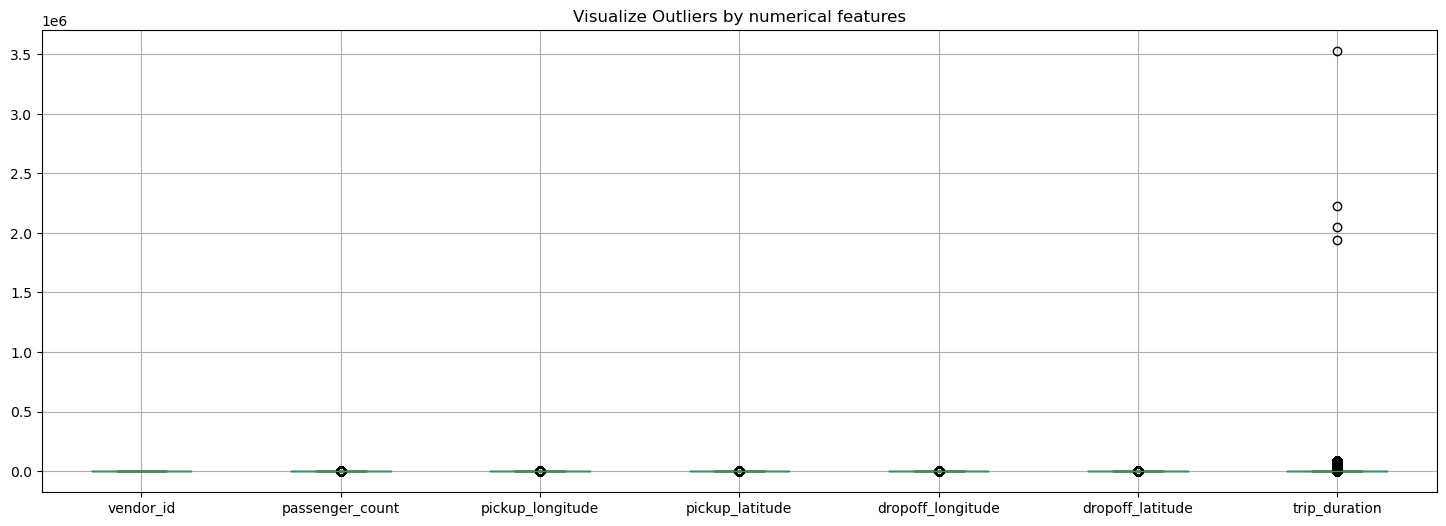

In [8]:
# Visualize outliers with box-whisker plot
plt.subplots(figsize=(18,6))
plt.title("Visualize Outliers by numerical features")

data.boxplot()
plt.show()

In [9]:
#... maybe some more

# Features engineering
## Handling the Target

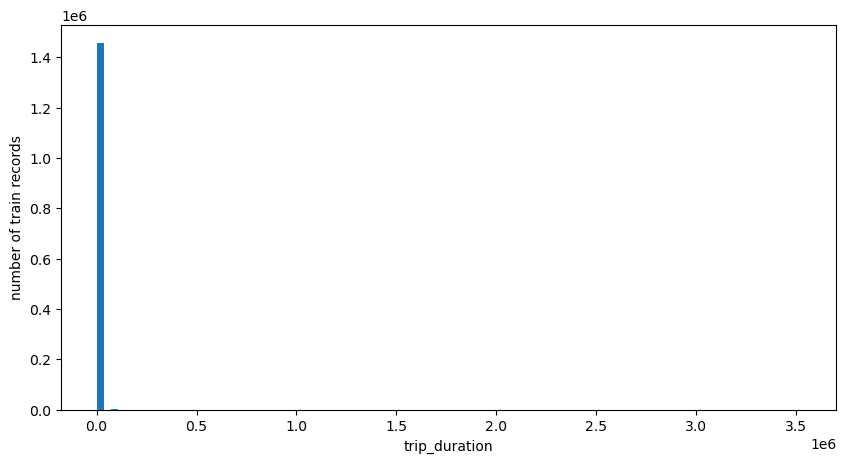

In [10]:
#Visualize the distribution of trip_duration values
plt.subplots(figsize=(10,5))
plt.hist(data['trip_duration'].values, bins=100)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.show()

# Training the Model

In [11]:
# Get all types of features
id_columns = ['id', 'vendor_id']
cat_features = [] # pending TODO ayo
num_features = ['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

In [12]:
# Step X: Load Training and Test data
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
X_train = train_data[num_features].values
y_train = train_data['trip_duration'].values

X_test = test_data[num_features].values
y_test = test_data['trip_duration'].values

In [13]:
# Init Evaluation metrics:
def custom_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def custom_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [14]:
# Step X + 1: Instantiate Gradient Descent and Polynomial Regression
# optimizer = GradientDescent(cost_function=mean_absolute_percentage_error)
optimizer = None
polyreg_1 = PolynomialRegression(degree=1, optimizer=optimizer) # goal is 580.69 MAPE
# polyreg_2 = PolynomialRegression(degree=2, optimizer=optimizer) # goal is 591.1805 MAPE

# Train Models
polyreg_1.fit(X_train, y_train)
# polyreg_2.fit(X_train, y_train)

In [15]:
# Evaluate Models
mse_score_1 = polyreg_1.evaluate( X_test, y_test, cost_function = custom_mse)
mape_score_1 = polyreg_1.evaluate(X_test, y_test, cost_function = custom_mape)
# mse_score_2 = polyreg_2.evaluate( X_test, y_test, cost_function = mean_squared_error)
# mape_score_2 = polyreg_2.evaluate(X_test, y_test, cost_function = mean_absolute_percentage_error)

print("Mean Squared Error (MSE):", mse_score_1)
print("Mean Absolute Percentage Error (MAPE):", mape_score_1)

Mean Squared Error (MSE): 10545027.87289795
Mean Absolute Percentage Error (MAPE): 158.02843123513847


In [20]:
### TO BE DELETED ###
# Test result against scikit-learn lib

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Step 3: Instantiate Polynomial Features and Linear Regression Model
degree = 1
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_train)

# Using scikit-learn's LinearRegression
lin_reg_sklearn = LinearRegression()
lin_reg_sklearn.fit(X_poly, y_train)

# Using custom PolynomialRegression
# optimizer = GradientDescent(cost_function=None)
poly_regression_custom = PolynomialRegression(degree=degree)
poly_regression_custom.fit(X_train, y_train)

# Step 5: Evaluate Models
# Evaluate scikit-learn's model
y_pred_sklearn = lin_reg_sklearn.predict(X_poly)
mse_sklearn = mean_squared_error(y_train, y_pred_sklearn)
mae_sklearn = mean_absolute_percentage_error(y_train, y_pred_sklearn)

# Evaluate custom model
y_pred_custom = poly_regression_custom.predict(X_train)
mse_custom = poly_regression_custom.evaluate(X_train, y_train, cost_function=custom_mse)
mape_custom = poly_regression_custom.evaluate(X_train, y_train, cost_function=custom_mape)

# Print results
print("Scikit-learn Model:")
print("Mean Squared Error (MSE):", mse_sklearn)
print("Mean Absolute Error (MAE):", mae_sklearn)

print("\nCustom Model:")
print("Mean Squared Error (MSE):", mse_custom)
print("Mean Absolute Error (MAE):", mape_custom)

NameError: name 'custom_mse' is not defined